<center><h2 class='glow', style="color:#000000">Healthcare Analytics Project<br><br>
Diabetes Prediction<br></h2></center>

In [210]:
#IMPORTING NECESSARY LIBRARIES THAT WILL BE NEEDED IN THE PROJECT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from rfpimp import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tabulate import tabulate
import pickle
import warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [211]:
#READING THE CSV AND STORING IT IN DIABETES VARIABLE
diabetes = pd.read_csv('diabetes_raw.csv')

In [212]:
#TAKING A LOOK AT MULTIPLE FEATURES WE HAVE
diabetes.head(3).T

,0,1,2
id,1000,1001,1002
chol,203.0,165.0,228.0
stab.glu,82,97,92
hdl,56.0,24.0,37.0
ratio,3.6,6.9,6.2
glyhb,4.31,4.44,4.64
location,Buckingham,Buckingham,Buckingham
age,46,29,58
gender,female,female,female
height,62.0,64.0,61.0


<h4><b>After reviewing the features we are making below mentioned changes in dataset.</b></h4><br>
Removing these features as we don't need them in analysis : <b>id, glyhb, location, frame, bp.2s, bp.2d</b><br>
We will be renaming the feature names to understandable format<br>
<b>Creating two new features:</b>BMI, Waist/hip ratio<br>
We will be checking for null values and that filling them with the mean of that particular column    

In [213]:
#DROPPING UNWANTED COLUMNS
diabetes_clean = diabetes.drop(['glyhb', 'location', 'frame', 'bp.2s', 'bp.2d', 'time.ppn'], axis=1)

In [214]:
# Making Correction To Feature Names & setting index to patient number
diabetes_clean.rename(columns = {'id' : 'Patient Number', 'chol' : 'Cholesterol',
                                 'stab.glu' : 'Glucose', 'hdl' : 'HDL Chol', 
                                 'ratio' : 'Chol/HDL ratio', 'age' : 'Age', 
                                 'gender' : 'Gender', 'height' : 'Height', 
                                 'weight' : 'Weight', 'bp.1s' : 'Systolic BP', 
                                 'bp.1d' : 'Diastolic BP', 'waist' : 'Waist', 
                                 'hip' : 'Hip'}, inplace = True) #inplace will make changes in orignal dataset which is diabetes_clean

In [215]:
#TAKING A LOOK
diabetes_clean.head(2).T

,0,1
Patient Number,1000,1001
Cholesterol,203.0,165.0
Glucose,82,97
HDL Chol,56.0,24.0
Chol/HDL ratio,3.6,6.9
Age,46,29
Gender,female,female
Height,62.0,64.0
Weight,121.0,218.0
Systolic BP,118.0,112.0


In [216]:
#CHECKING FOR DATA TYPES
diabetes_clean.dtypes

Patient Number      int64
Cholesterol       float64
Glucose             int64
HDL Chol          float64
Chol/HDL ratio    float64
Age                 int64
Gender             object
Height            float64
Weight            float64
Systolic BP       float64
Diastolic BP      float64
Waist             float64
Hip               float64
Diabetes           object
dtype: object

In [217]:
#CHECKING FOR NULL VALUES IN THE DATA

diabetes_clean.isnull().sum()

Patient Number    0
Cholesterol       1
Glucose           0
HDL Chol          1
Chol/HDL ratio    1
Age               0
Gender            0
Height            5
Weight            1
Systolic BP       5
Diastolic BP      5
Waist             2
Hip               2
Diabetes          0
dtype: int64

In [218]:
#FILLING NULL'S WITH MEAN VALUE

for i in diabetes_clean.columns:
    if i not in ["Gender", "Diabetes"]:
        diabetes_clean[i].fillna(diabetes_clean[i].mean(), inplace = True)

In [219]:
#CHECKING FOR NULL VALUES NOW
diabetes_clean.isnull().sum()

Patient Number    0
Cholesterol       0
Glucose           0
HDL Chol          0
Chol/HDL ratio    0
Age               0
Gender            0
Height            0
Weight            0
Systolic BP       0
Diastolic BP      0
Waist             0
Hip               0
Diabetes          0
dtype: int64

<b>

In [220]:
#CREATING NEW FEATURES'S

diabetes_clean['BMI'] = round(diabetes_clean.Weight.apply(lambda x: x*703)/(diabetes_clean.Height.apply(lambda x: x*x)), 1)
diabetes_clean['Waist/Hip Ratio'] = round(diabetes_clean.Waist/diabetes_clean.Hip, 2)

In [221]:
#SETTING INDEX TO PATIENT NUMBER AND REARRANGING COLUMNS IN ORDER

diabetes_clean.set_index('Patient Number', inplace = True)
diabetes_clean = diabetes_clean[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Waist', 'Hip', 'Waist/Hip Ratio', 'Glucose', 'Cholesterol', 'HDL Chol', 'Chol/HDL ratio', 'Systolic BP', 'Diastolic BP', 'Diabetes']]

In [222]:
diabetes_clean.head(2)

,Gender,Age,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,Glucose,Cholesterol,HDL Chol,Chol/HDL ratio,Systolic BP,Diastolic BP,Diabetes
Patient Number,,,,,,,,,,,,,,,
1000,female,46,62.0,121.0,22.1,29.0,38.0,0.76,82,203.0,56.0,3.6,118.0,59.0,No Diabetes
1001,female,29,64.0,218.0,37.4,46.0,48.0,0.96,97,165.0,24.0,6.9,112.0,68.0,Diabetes


<h4><b>NOW WE WILL REVIEW SOME STATISTICAL INFORMATION IN DATA AND IF WE HAVE ANY BIAS IN THE DATA</b></h4>

In [223]:
diabetes_clean.describe()

,Age,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,Glucose,Cholesterol,HDL Chol,Chol/HDL ratio,Systolic BP,Diastolic BP
count,403.000000,403.000000,403.00000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,46.851117,66.020101,177.59204,28.749380,37.900249,43.039900,0.880769,106.672457,207.845771,50.445274,4.521642,136.904523,83.321608
std,16.312333,3.894070,40.29046,6.593534,5.715043,5.642624,0.072295,53.076655,44.390242,17.241141,1.725736,22.599166,13.504452
min,19.000000,52.000000,99.00000,15.200000,26.000000,30.000000,0.680000,48.000000,78.000000,12.000000,1.500000,90.000000,48.000000
25%,34.000000,63.000000,151.00000,24.100000,33.000000,39.000000,0.830000,81.000000,179.000000,38.000000,3.200000,122.000000,75.000000
50%,45.000000,66.000000,173.00000,27.800000,37.000000,42.000000,0.880000,89.000000,204.000000,46.000000,4.200000,136.000000,82.000000
75%,60.000000,69.000000,200.00000,32.200000,41.000000,46.000000,0.920000,106.000000,230.000000,59.000000,5.400000,146.000000,90.000000
max,92.000000,76.000000,325.00000,55.800000,56.000000,64.000000,1.140000,385.000000,443.000000,120.000000,19.299999,250.000000,124.000000


<h4><b>We got some usefull statistical insights from above table:</b></h4><br>
For "Age" variable we can see that 75% of data is below age 60 whereas the max age is 92 which can misslead us.<br>
&nbsp; &nbsp; &#x2022; To fix this we will take a look at value counts above age 60 and remove outliers from data.<br>
We have the same problem with "Glucose", "Cholesterol", "HDL Chol" & "Diastolic BP" variables. We will take a closer look at the distribution of these variables by making boxplot

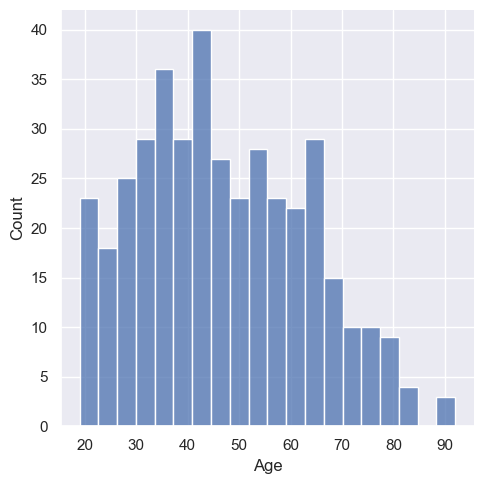

In [224]:
# Y = np.arange(806, step = 2)
sns.displot(diabetes_clean, x="Age", bins=20)

In [225]:
diabetes_clean.Age[diabetes_clean.Age>60].value_counts()

63    11
66     7
61     7
68     6
65     6
62     5
76     5
64     5
67     4
71     4
78     4
72     4
70     4
74     3
80     2
79     2
82     2
75     2
73     2
69     1
84     1
83     1
81     1
91     1
92     1
89     1
Name: Age, dtype: int64

In [226]:
#AFTER REVIEWING WE ARE REMOVING OBSERVATION WHICH HAS AGE > 64

diabetes_clean.drop(diabetes_clean[diabetes_clean.Age>64].index, inplace=True)

In [227]:
#CREATING A FUNCTION THAT WILL CALCULATE THE UPPER BOUND WHICH WILL BE USED TO REMOVE OUTLIERS

def upper_bound(feature_name):
    q1 = diabetes_clean[feature_name].quantile(0.25)
    q3 = diabetes_clean[feature_name].quantile(0.75)
    iqr = q3 - q1 
    upper_bound_value = q3 +(1.5 * iqr)
    return upper_bound_value

In [228]:
diabetes_clean['Glucose']

Patient Number
1000      82
1001      97
1002      92
1005      90
1008      94
        ... 
41501     84
41506    369
41507     89
41510    269
41752     76
Name: Glucose, Length: 339, dtype: int64

135.0

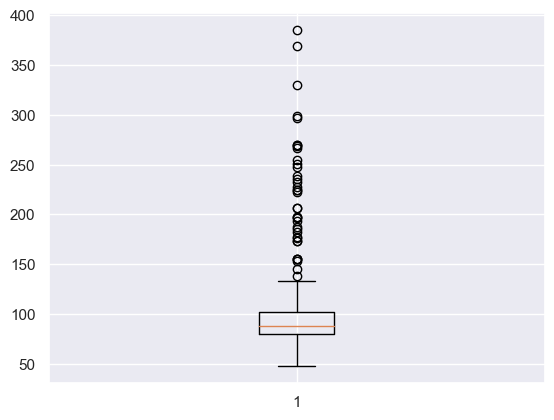

In [229]:
#USING BOXBLOT TO IDENTIFY OUTLIERS FOR GLUCOSE VARIABLE AND CALCULATING THE INTER QUARTILE RANGE AND UPPER
# BOUND TO REMOVE OUTLIERS.

plt.boxplot(diabetes_clean.Glucose)
upper_bound("Glucose")

In [230]:
diabetes_clean.Glucose[diabetes_clean.Glucose>135].value_counts()

155    3
206    2
173    2
225    2
270    2
197    2
138    1
153    1
248    1
187    1
228    1
297    1
267    1
236    1
251    1
369    1
145    1
239    1
385    1
299    1
255    1
196    1
177    1
176    1
182    1
185    1
233    1
223    1
193    1
330    1
269    1
Name: Glucose, dtype: int64

301.75

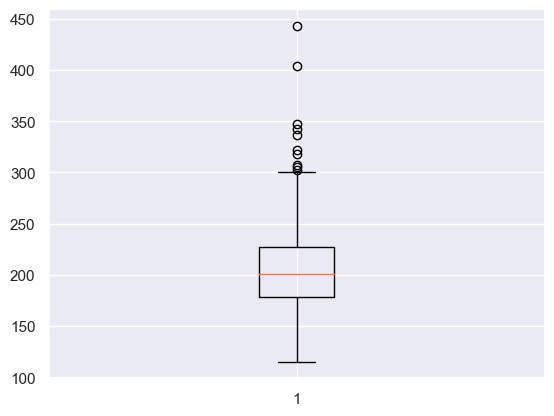

In [231]:
plt.boxplot(diabetes_clean["Cholesterol"])
upper_bound("Cholesterol")

89.25

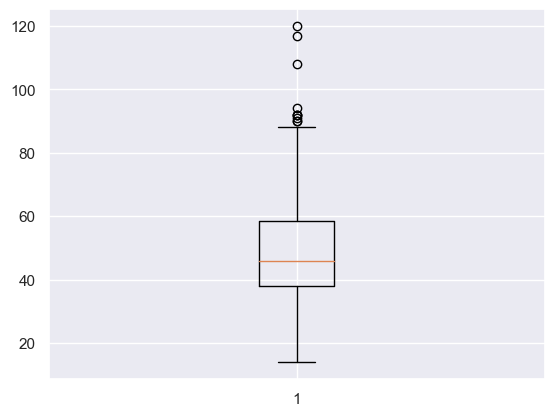

In [232]:
plt.boxplot(diabetes_clean["HDL Chol"])
upper_bound("HDL Chol")

In [233]:
diabetes_clean["HDL Chol"][diabetes_clean["HDL Chol"]>89.25].value_counts()

92.0     3
90.0     2
94.0     1
108.0    1
120.0    1
117.0    1
91.0     1
Name: HDL Chol, dtype: int64

117.5

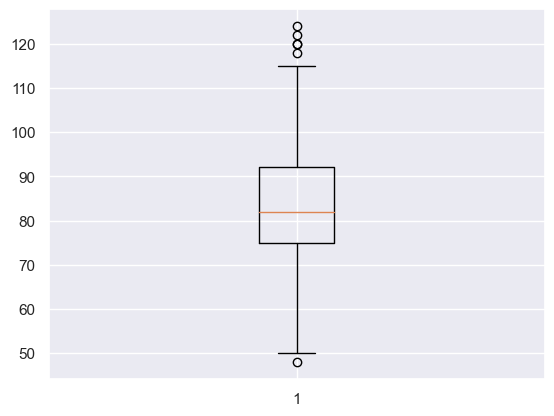

In [234]:
plt.boxplot(diabetes_clean["Diastolic BP"])
upper_bound("Diastolic BP")

In [235]:
diabetes_clean["Diastolic BP"][diabetes_clean["Diastolic BP"]>117.5].value_counts()

120.0    2
122.0    1
118.0    1
124.0    1
Name: Diastolic BP, dtype: int64

<b> Now we have looked at the distribution of the variables which were having outliers and also calculated the upper bound, so now we can filter out data based on these values, but for "Glucose" instead of taking 135 we will be taking 155 as we have 3 observations where Glucose = 155 and for "HDL Chol" we will be taking 92</b>

In [236]:
#FILTERING

diabetes_clean.drop(diabetes_clean[diabetes_clean.Glucose>135].index, inplace=True)
diabetes_clean.drop(diabetes_clean[diabetes_clean.Cholesterol>301.75].index, inplace=True)
diabetes_clean.drop(diabetes_clean[diabetes_clean["HDL Chol"]>89.25].index, inplace=True)
diabetes_clean.drop(diabetes_clean[diabetes_clean["Diastolic BP"]>117.5].index, inplace=True)

Text(0, 0.5, 'Glucose')

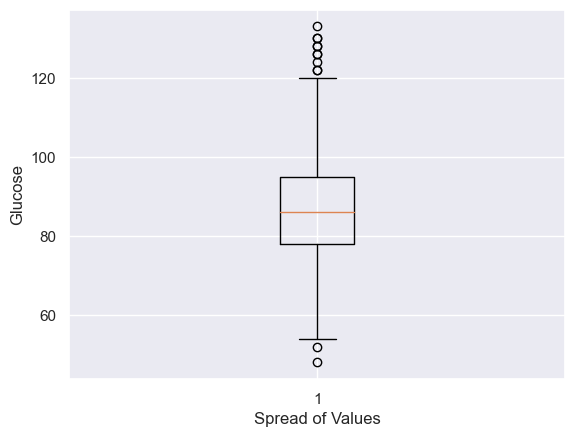

In [237]:
plt.boxplot(diabetes_clean["Glucose"])
plt.xlabel('Spread of Values')
plt.ylabel('Glucose')

Text(0, 0.5, 'Cholesterol')

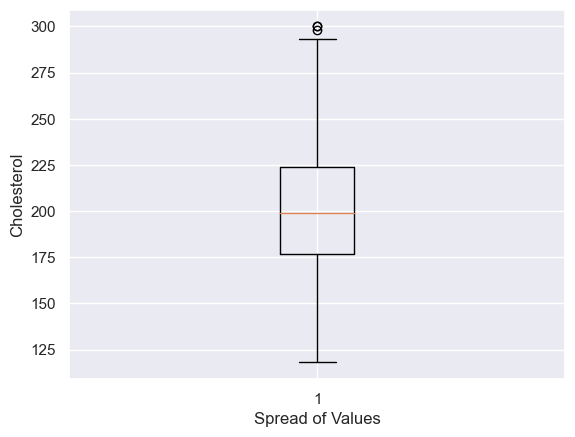

In [238]:
plt.boxplot(diabetes_clean["Cholesterol"])
plt.xlabel('Spread of Values')
plt.ylabel('Cholesterol')

Text(0, 0.5, 'HDL Cholesterol')

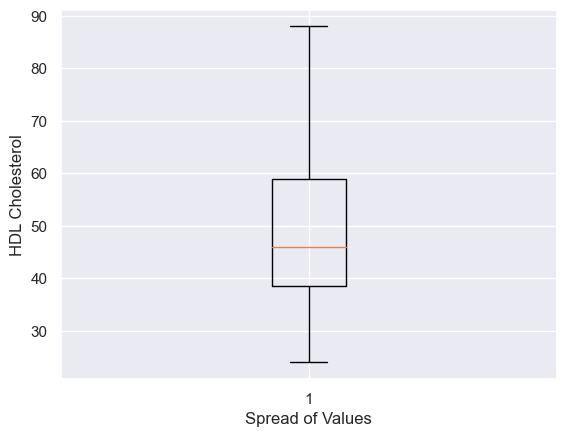

In [239]:
plt.boxplot(diabetes_clean["HDL Chol"])
plt.xlabel('Spread of Values')
plt.ylabel('HDL Cholesterol')

Text(0, 0.5, 'Diastolic BP')

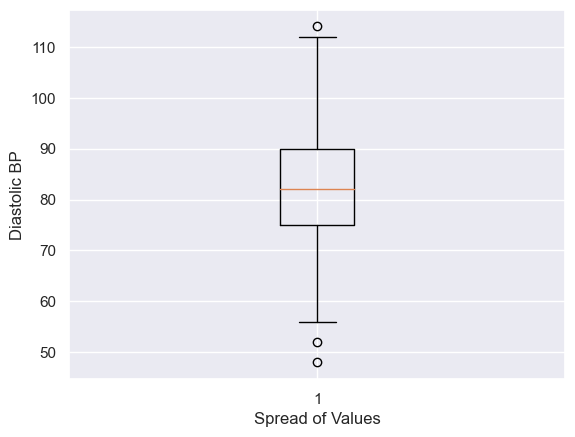

In [240]:
plt.boxplot(diabetes_clean["Diastolic BP"])
plt.xlabel('Spread of Values')
plt.ylabel('Diastolic BP')

<h4><b>Now we will see the distribution of male & females throughout the dataset</b></h4>
<b>Also, we will be looking at the distribution of diabetes with gender.

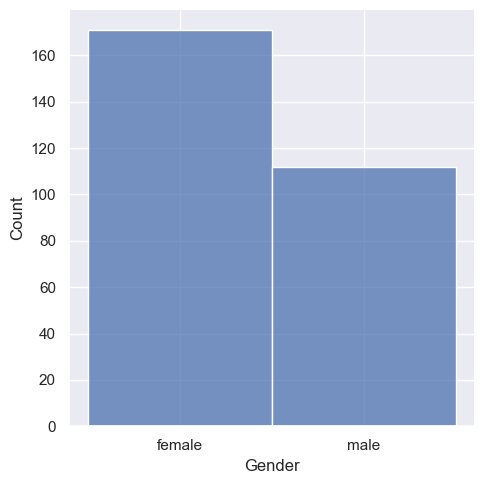

In [241]:
sns.displot(data = diabetes_clean, x = "Gender")

<b>We can see from the above plot we don't have that much difference in the count of male & female</b>

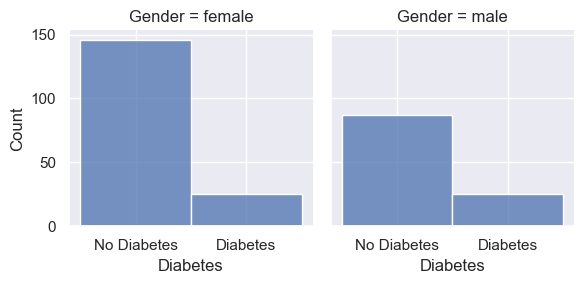

In [242]:
# sns.set(rc={'figure.figsize':(20,20)})
g = sns.FacetGrid(diabetes_clean, col="Gender")
g.map(sns.histplot, "Diabetes")

<b>From the above plot we can see that there are almost equal number of patient who have diabetes regardless of gender but we can also see that there are more female who don't have diabetes which is considerable as number of female are little bit more in our dataset when compared to number of male.</b>

<h4>Now we will start creating machine learning models. We will be using below mentioned classification algorithms from skelarn library.</h4>
<b>Logistic Regression</b><br>
<b>Decision Tree</b><br>
<b>Random Forest</b><br>
<b>Fully Connected Neural Networks</b>

In [243]:
#CHANGING GENDER AND DIABETES COLUMN INTO BINARY (0 & 1)

diabetes_clean['Gender'] = diabetes_clean.Gender.map({'male': 1, 'female' : 0})
diabetes_clean['Diabetes'] = diabetes_clean.Diabetes.map({'Diabetes' : 1, 'No Diabetes': 0})

<h3>Correltion matrix</h3>

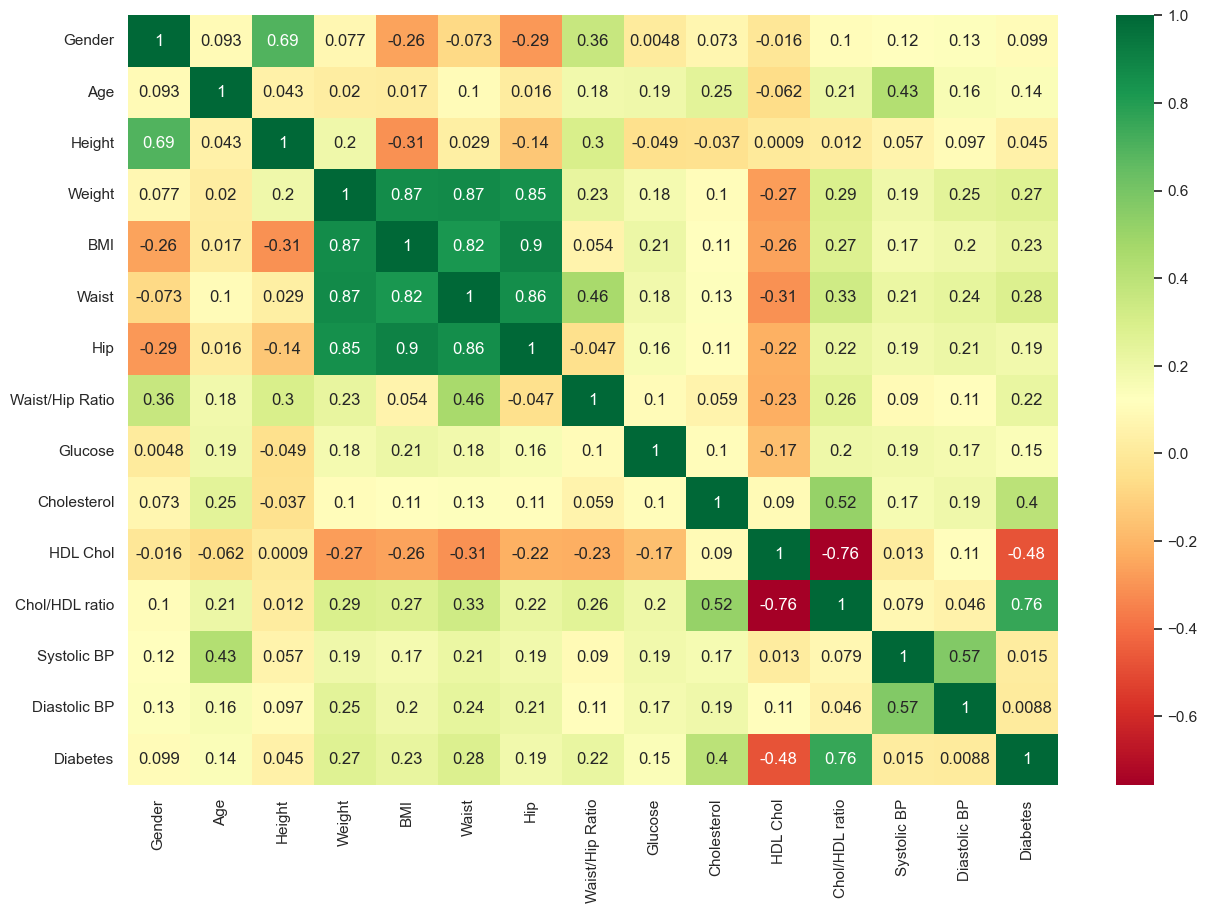

In [244]:
plt.figure(figsize=(15,10))
p = sns.heatmap(diabetes_clean.corr(), annot=True,cmap ='RdYlGn')

<h3>Now We will start building machine learning models.</h3>

In [245]:
#CREATING FUNCTION FOR EVALUATING THE TEST SCORES

def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix : \n{cm}\n')
    print(f'The Accuracy Score is : {accuracy_score(y_test, y_pred)}\n')
    print(f'The percision Score is : {precision_score(y_test, y_pred)}\n')
    print(f'The Recall Score is : {recall_score(y_test, y_pred)}\n')
    print(f'The f1 Score is : {f1_score(y_test, y_pred)}\n')
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (6, 4))
    sns.heatmap(df_cm, annot = True, fmt ='g')
    print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

In [246]:
x = diabetes_clean.drop(['Diabetes', 'Chol/HDL ratio'], axis=1)
y = diabetes_clean['Diabetes']

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.3)

<h3>Applying Logistic Regression model by using the function created above.</h3>

In [248]:
model_log = LogisticRegression(penalty='l2', verbose=0, n_jobs=-1)
model_log.fit(x_train,y_train)
train_pred = model_log.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print(f'The training accuracy of Logistic Regression model is: {train_acc}\n')
test_pred_log = model_log.predict(x_test)
test_acc = accuracy_score(y_test, test_pred_log)
print(f'The test accuracy of Logistic Regression model is {test_acc}\n')

The training accuracy of Logistic Regression model is: 1.0

The test accuracy of Logistic Regression model is 0.9882352941176471



In [249]:
pickle_out = open("model_log.pkl", "wb") 
pickle.dump(model_log, pickle_out)
pickle_out.close()

Confusion Matrix : 
[[72  1]
 [ 0 12]]

The Accuracy Score is : 0.9882352941176471

The percision Score is : 0.9230769230769231

The Recall Score is : 1.0

The f1 Score is : 0.9600000000000001

Test Data Accuracy: 0.9882


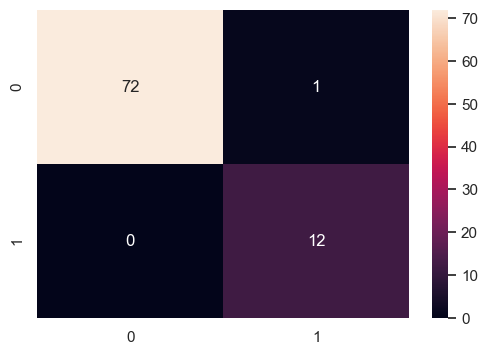

In [250]:
#REVIEWING CONFUSION METRICS AND DIFFERENT SCORES

confusionMatrix(y_test, test_pred_log)

<h3>Creating Decesion Tree Classifier</h3>

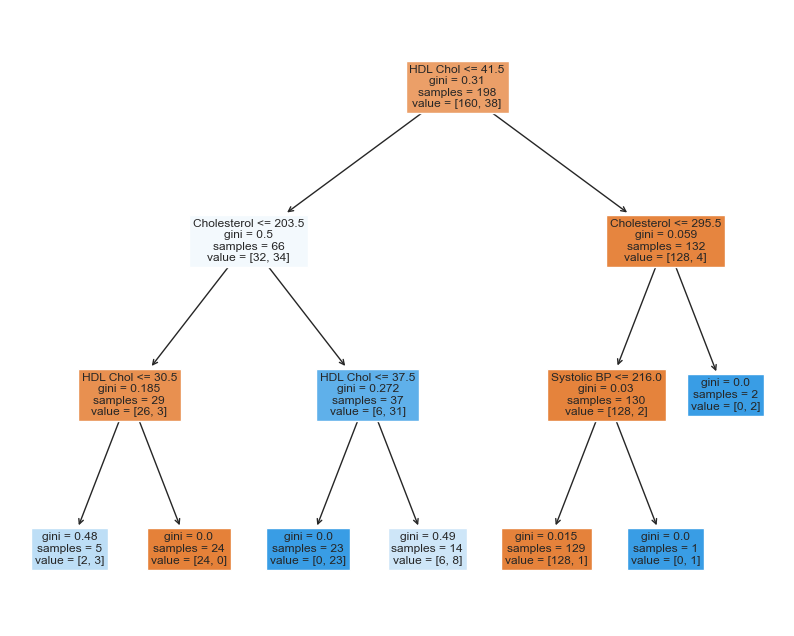

In [251]:
regr=DecisionTreeClassifier(random_state=12345, max_depth=3)
model=regr.fit(x_train, y_train)
fig=plt.figure(figsize=(10,8))
_=tree.plot_tree(regr, feature_names=x_train.columns, filled=True)

In [252]:
train_pred = model.predict(x_train)
train_error = mean_squared_error(y_train, train_pred)
test_pred_dec = model.predict(x_test)
test_error = mean_squared_error(y_test, test_pred_dec)
print(f'The training error is : {train_error}\n')
print(f'The test error is : {test_error}\n')

The training error is : 0.045454545454545456

The test error is : 0.07058823529411765



Confusion Matrix : 
[[71  2]
 [ 4  8]]

The Accuracy Score is : 0.9294117647058824

The percision Score is : 0.8

The Recall Score is : 0.6666666666666666

The f1 Score is : 0.7272727272727272

Test Data Accuracy: 0.9294


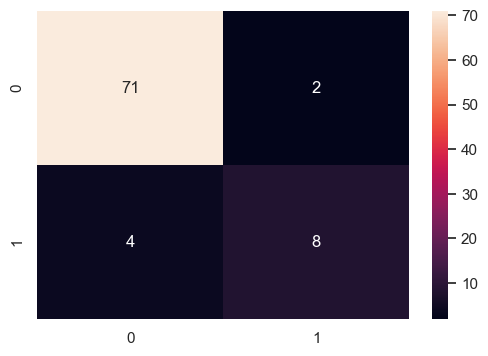

In [253]:
#REVIEWING CONFUSION METRICS AND DIFFERENT SCORES FOR DECISION TREE MODEL

confusionMatrix(y_test, test_pred_dec)

<h3>CREATING RANDOM FOREST MODEL</h3>

In [254]:
# CREATING DUNCTION TO CALCULATE R SQUARED ERROR

def squared_error(y_i, y_hat):
    y_bar = np.mean(y_i)
    SS_res = np.sum((y_i - y_hat)**2)
    SS_tot = np.sum((y_i - y_bar)**2)
    SS = 1 - (SS_res/SS_tot)
    return SS

In [255]:
#CREATING RANDOM FOREST MODEL
def random_forest(x_train, y_train):
    rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True)
    rf.fit(x_train, y_train)
    oob = rf.oob_score_
    print(f"OOB R^2 is {oob:.5f}")
    return rf, oob

In [256]:
#CALCULATING TRAINING AND TESTING ERROR

rf, oob = random_forest(x_train, y_train)
train_pred = rf.predict(x_train)
train_error = mean_squared_error(y_train, train_pred)
test_pred_rand = rf.predict(x_test)
test_error = mean_squared_error(y_test, test_pred_rand)
test_ss_error = squared_error(y_test, test_pred_rand)
print(f'The training error is : {train_error}\n')
print(f'The test error is : {test_error}\n')
print(f'The Squared error for test dataset is : {test_ss_error}\n')

OOB R^2 is 0.80303
The training error is : 0.015151515151515152

The test error is : 0.10588235294117647

The Squared error for test dataset is : 0.12671232876712324



Confusion Matrix : 
[[72  1]
 [ 8  4]]

The Accuracy Score is : 0.8941176470588236

The percision Score is : 0.8

The Recall Score is : 0.3333333333333333

The f1 Score is : 0.47058823529411764

Test Data Accuracy: 0.8941


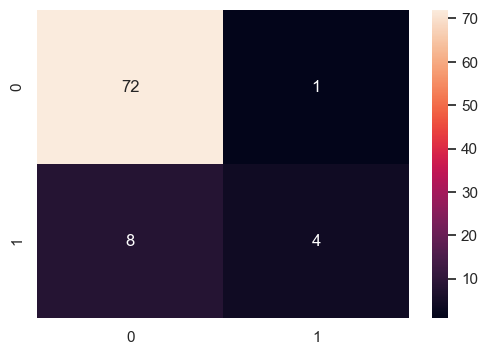

In [257]:
#REVIEWING CONFUSION METRICS AND DIFFERENT SCORES FOR RANDOM FOREST MODEL

confusionMatrix(y_test, test_pred_rand)

<h4>Feature Importance</h4>

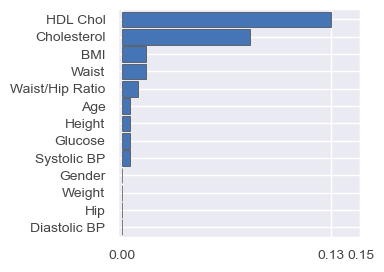

In [258]:
def evaluate(X, y):
    rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    return rf, oob
rf, oob_r2 = evaluate(x_train, y_train)
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')
showimp(rf, x_train, y_train)

<h3>We can see in above plot that Gender, Hip, Height, Diastolic BP are not playing major role while training our model.<br>So we can drop them.</h3> 

In [259]:
x_train_new = x_train.drop(['Gender', 'Hip', 'Height', 'Diastolic BP'], axis=1)
x_test_new = x_test.drop(['Gender', 'Hip', 'Height', 'Diastolic BP'], axis=1)

In [260]:
rf, oob = random_forest(x_train_new, y_train)
train_pred = rf.predict(x_train_new)
train_error = mean_squared_error(y_train, train_pred)
test_pred_rand_new = rf.predict(x_test_new)
test_error = mean_squared_error(y_test, test_pred_rand_new)
test_ss_error = squared_error(y_test, test_pred_rand_new)
print(f'The training error is : {train_error}\n')
print(f'The test error is : {test_error}\n')
print(f'The Squared error for test dataset is : {test_ss_error}\n')

OOB R^2 is 0.84848
The training error is : 0.005050505050505051

The test error is : 0.10588235294117647

The Squared error for test dataset is : 0.12671232876712324



Confusion Matrix : 
[[72  1]
 [ 8  4]]

The Accuracy Score is : 0.8941176470588236

The percision Score is : 0.8

The Recall Score is : 0.3333333333333333

The f1 Score is : 0.47058823529411764

Test Data Accuracy: 0.8941


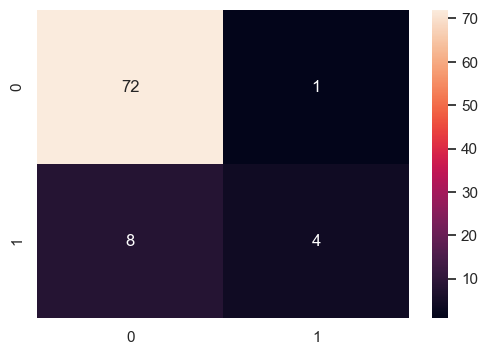

In [261]:
confusionMatrix(y_test, test_pred_rand_new)

<h3>Now we will create fully connected Neural Neworks model</h3>

In [262]:
x_train = x_train.values
x_test = x_test.values

In [263]:
print(x_train.shape)
print(x_test.shape)

(198, 13)
(85, 13)


In [264]:
print(y_train.shape)
print(y_test.shape)

(198,)
(85,)


In [265]:
model = Sequential()
model.add(Flatten(input_shape = [13]))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 13)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,562
Trainable params: 18,562
Non-trainable params: 0
_________________________________________________________________


In [266]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [267]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping( monitor="loss",
                            patience=2,
                            restore_best_weights=True)

In [268]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 5, verbose = 1, callbacks=[callback])

Epoch 1/10
 1/40 [..............................] - ETA: 12s - loss: 0.6359 - accuracy: 0.8000

2022-12-05 12:06:12.800476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 14ms/step - loss: 0.4821 - accuracy: 0.8030
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3960 - accuracy: 0.8131
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8333
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2907 - accuracy: 0.8737
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.8586
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2835 - accuracy: 0.8788
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2339 - accuracy: 0.8939
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.8939
Epoch 9/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.8788


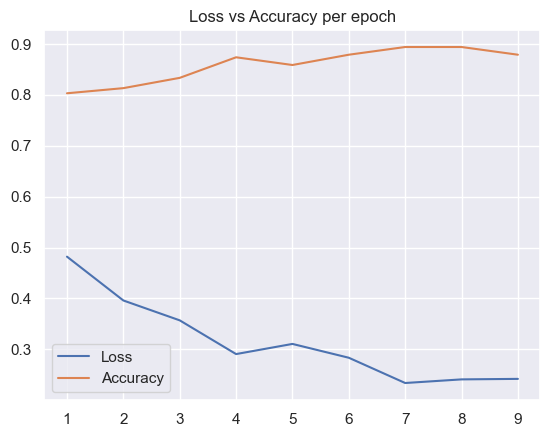

In [269]:
loss = history.history["loss"]
Accuracy = history.history["accuracy"]
epochs = range(1, len(loss) + 1)

# plt.figure()
plt.plot(epochs, loss, "-", label="Loss")
plt.plot(epochs, Accuracy, "-", label="Accuracy")
plt.title("Loss vs Accuracy per epoch")
plt.legend()
plt.show()

In [270]:
test_accuracy = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 0.2217 - accuracy: 0.8824


2022-12-05 12:06:15.734861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [271]:
test_pred = model.predict(x_test)

3/3 [==============================] - 0s 6ms/step


2022-12-05 12:06:15.851158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [272]:
test_pred_class = []
for i in test_pred:
    if max(i) == i[0]:
        test_pred_class.append(0)
    else:
        test_pred_class.append(1)

In [273]:
from sklearn.metrics import mean_absolute_error
test_pred_class = pd.Series(test_pred_class)
test_error = mean_absolute_error(y_test, test_pred_class)
test_error

0.11764705882352941

Confusion Matrix : 
[[73  0]
 [10  2]]

The Accuracy Score is : 0.8823529411764706

The percision Score is : 1.0

The Recall Score is : 0.16666666666666666

The f1 Score is : 0.2857142857142857

Test Data Accuracy: 0.8824


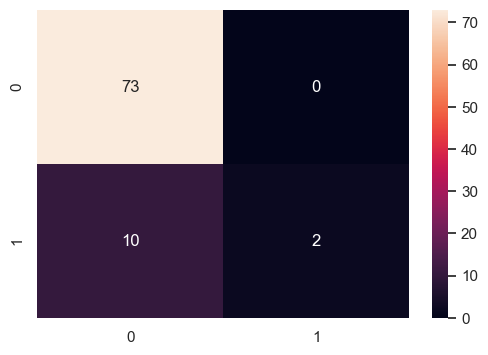

In [274]:
confusionMatrix(y_test, test_pred_class)

In [275]:
table = [['Model Name', 'Accuracy', 'TP, FP', 'FN, TN'], 
         ['Logistic Regression', f'{round(accuracy_score(y_test, test_pred_log),2)*100}%', list(confusion_matrix(y_test, test_pred_log)[0]), list(confusion_matrix(y_test, test_pred_log)[1])],
         ['Decision Tree Classifier', f'{round(accuracy_score(y_test, test_pred_dec),2)*100}%', list(confusion_matrix(y_test, test_pred_dec)[0]), list(confusion_matrix(y_test, test_pred_dec)[1])],
         ['Random Forest Classifier', f'{round(accuracy_score(y_test, test_pred_rand),2)*100}%', list(confusion_matrix(y_test, test_pred_rand)[0]), list(confusion_matrix(y_test, test_pred_rand)[1])],
         ['Random Forest Classifier After Dropping Feature', f'{round(accuracy_score(y_test, test_pred_rand_new),2)*100}%', list(confusion_matrix(y_test, test_pred_rand_new)[0]), list(confusion_matrix(y_test, test_pred_rand_new)[1])],
         ['Fully Connected Neural Network', f'{round(accuracy_score(y_test, test_pred_class),2)*100}%', list(confusion_matrix(y_test, test_pred_class)[0]), list(confusion_matrix(y_test, test_pred_class)[1])]]

In [276]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-------------------------------------------------+------------+----------+----------+
| Model Name                                      | Accuracy   | TP, FP   | FN, TN   |
+=================================================+============+==========+==========+
| Logistic Regression                             | 99.0%      | [72, 1]  | [0, 12]  |
+-------------------------------------------------+------------+----------+----------+
| Decision Tree Classifier                        | 93.0%      | [71, 2]  | [4, 8]   |
+-------------------------------------------------+------------+----------+----------+
| Random Forest Classifier                        | 89.0%      | [72, 1]  | [8, 4]   |
+-------------------------------------------------+------------+----------+----------+
| Random Forest Classifier After Dropping Feature | 89.0%      | [72, 1]  | [8, 4]   |
+-------------------------------------------------+------------+----------+----------+
| Fully Connected Neural Network           

In [277]:
compare_dic = {
    'model_name' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'RM Dropping Features', 'Fully Connected Neural Network'],
    'Accuracy' : [round(accuracy_score(y_test, test_pred_log),2)*100, round(accuracy_score(y_test, test_pred_dec),2)*100, round(accuracy_score(y_test, test_pred_rand),2)*100, round(accuracy_score(y_test, test_pred_rand_new),2)*100, round(accuracy_score(y_test, test_pred_class),4)*100],
    'Recall Score' : [round(recall_score(y_test, test_pred_log),2)*100, round(recall_score(y_test, test_pred_dec),2)*100, round(recall_score(y_test, test_pred_rand),2)*100, round(recall_score(y_test, test_pred_rand_new),2)*100, round(recall_score(y_test, test_pred_class),4)*100],
    'Percision Score': [round(precision_score(y_test, test_pred_log),2)*100, round(precision_score(y_test, test_pred_dec),2)*100, round(precision_score(y_test, test_pred_rand),2)*100, round(precision_score(y_test, test_pred_rand_new),2)*100, precision_score(y_test, test_pred_class)*100],
    'F1 Score' : [round(f1_score(y_test, test_pred_log),2)*100, round(f1_score(y_test, test_pred_dec),2)*100, round(f1_score(y_test, test_pred_rand),2)*100, round(f1_score(y_test, test_pred_rand_new),2)*100, round(f1_score(y_test, test_pred_class),4)*100]
}

In [278]:
scores_df = pd.DataFrame(compare_dic)

In [279]:
scores_df.to_excel('/Users/rohityadav/College-Data/DAB200_PYTHON/Healthcare-Project/Diabetes_Prediction/scores.xlsx')

<h3>COMPARISION CHART</h3>

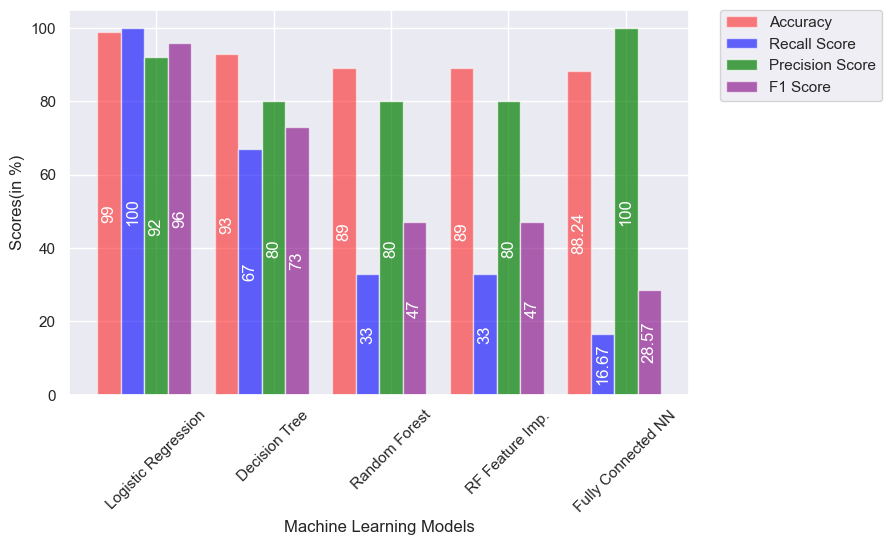

/Users/rohityadav/tensorflow/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohityadav/tensorflow/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [280]:
label = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'RF Feature Imp.', 'Fully Connected NN']
x = np.arange(5)
y1 = list(scores_df.Accuracy)
y2 = list(scores_df['Recall Score'])
y3 = list(scores_df['Percision Score'])
y4 = list(scores_df['F1 Score'])
width = 0.2
fig, ax = plt.subplots(figsize=(8,5))  
ax.bar(x-0.4, y1, width, color='red', alpha=0.5, tick_label='1')
ax.bar(x-0.2, y2, width, color='blue', alpha=0.6)
ax.bar(x, y3, width, color='green', alpha=0.7)
ax.bar(x+0.2, y4, width, color='purple', alpha=0.6)
ax.set_xticks(x, label, rotation=45)
for bars in ax.containers:
    ax.bar_label(bars, rotation=90, label_type='center', color='white', )
plt.xlabel('Machine Learning Models')
plt.ylabel("Scores(in %)")
ax.legend(['Accuracy',	'Recall Score',	'Precision Score', 'F1 Score'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<h2>CONCLUSION</h2>
<p>After creating multiple machine learning models by applying different techniques we can see the performance comparision of different models in the above table. We can clearly see that the logistic regression is performing better when compared to other models. Also we can see that in the case of random forest model the accuracy has improved after applying feature importance technique. We can go ahead with logistic regression model to accurately predict weather a patient has diabetes or not, additionally you can find the attached tableau file to gain some useful insights regarding the dataset.</p>
    